In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
#img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_path_1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/kianu1.png'  
img_path_2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/kianu2.jpg'  
img_path_3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/kianu3.jpg'
img_path_4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog_1.jpg'  
img_path_5 = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog_2.jpg'
img_path_6 = os.getenv('HOME')+'/aiffel/human_segmentation/images/black_girl.jpg'
img_path_7 = os.getenv('HOME')+'/aiffel/human_segmentation/images/tiger.jpg'

img_orig_1 = cv2.imread(img_path_1) 
img_orig_2 = cv2.imread(img_path_2) 
img_orig_3 = cv2.imread(img_path_3) 
img_orig_4 = cv2.imread(img_path_4) 
img_orig_5 = cv2.imread(img_path_5) 
img_orig_6 = cv2.imread(img_path_6) 
img_orig_7 = cv2.imread(img_path_7) 

In [3]:
img_orig_1.shape, img_orig_2.shape, img_orig_3.shape, img_orig_4.shape, img_orig_5.shape, img_orig_6.shape,img_orig_7.shape

((320, 433, 3),
 (183, 275, 3),
 (454, 680, 3),
 (467, 700, 3),
 (194, 259, 3),
 (225, 225, 3),
 (163, 310, 3))

In [4]:
img_origs = [img_orig_1, img_orig_2, img_orig_3, img_orig_4, img_orig_5, img_orig_6, img_orig_7]
img_paths = [img_path_1, img_path_2, img_path_3, img_path_4, img_path_5, img_path_6, img_path_7]

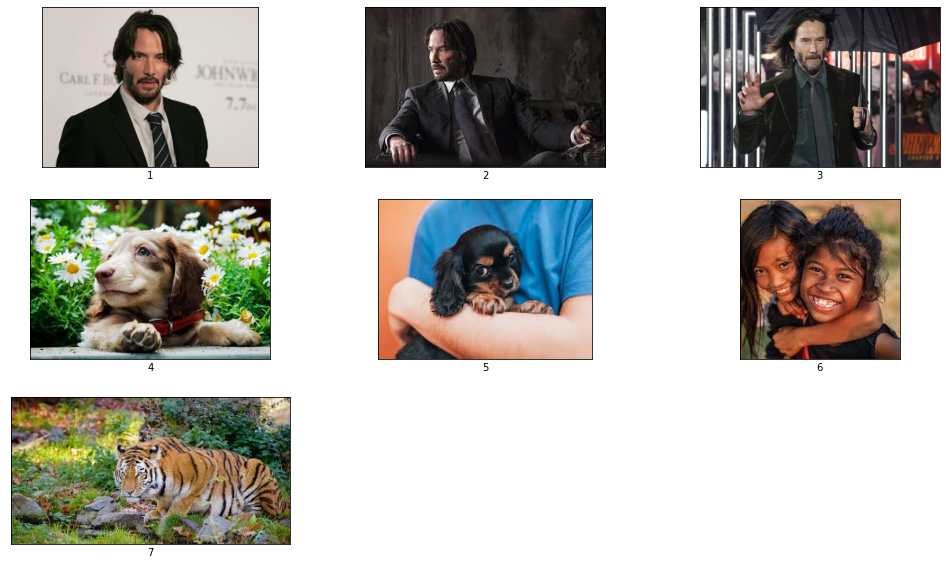

In [5]:
rows = 3
cols = 3

def imgs_show(img_origs, rows, cols):
    fig = plt.figure(figsize=(17, 10))

    for index, img_orig in enumerate(img_origs):  
        ax = fig.add_subplot(rows, cols, index+1)
        ax.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
        ax.set_xlabel(index+1)
        ax.set_xticks([]), ax.set_yticks([])
    plt.show()

imgs_show(img_origs, rows, cols)

In [6]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f5e0376d2e0>)

In [7]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [8]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [9]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [10]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [11]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

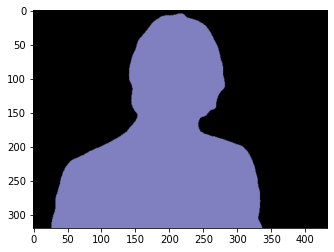

In [12]:
segvalues, output = model.segmentAsPascalvoc(img_path_1) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
plt.imshow(output)
plt.show()

(320, 433)


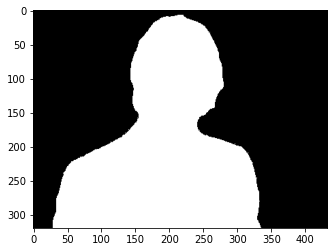

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map_1 = np.all(output==seg_color, axis=-1) 
print(seg_map_1.shape) 
plt.imshow(seg_map_1, cmap='gray')
plt.show()

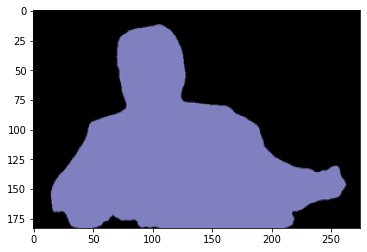

In [14]:
segvalues, output = model.segmentAsPascalvoc(img_path_2) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
plt.imshow(output)
plt.show()

(183, 275)


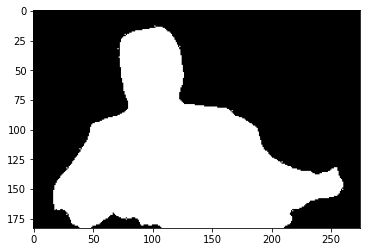

In [15]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map_2 = np.all(output==seg_color, axis=-1) 
print(seg_map_2.shape) 
plt.imshow(seg_map_2, cmap='gray')
plt.show()

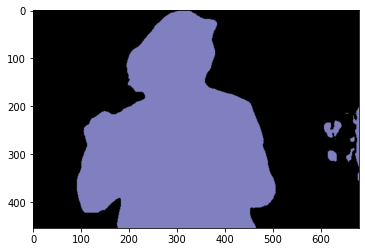

In [16]:
segvalues, output = model.segmentAsPascalvoc(img_path_3) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
plt.imshow(output)
plt.show()

(454, 680)


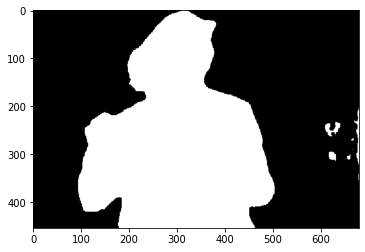

In [17]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map_3 = np.all(output==seg_color, axis=-1) 
print(seg_map_3.shape) 
plt.imshow(seg_map_3, cmap='gray')
plt.show()

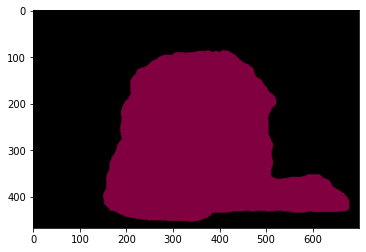

In [18]:
segvalues, output = model.segmentAsPascalvoc(img_path_4) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
plt.imshow(output)
plt.show()

(467, 700)


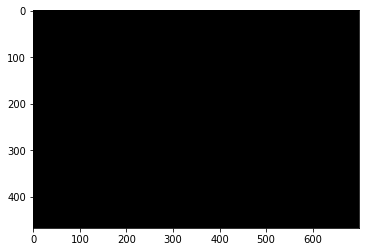

In [19]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map_4 = np.all(output==seg_color, axis=-1) 
print(seg_map_4.shape) 
plt.imshow(seg_map_4, cmap='gray')
plt.show()

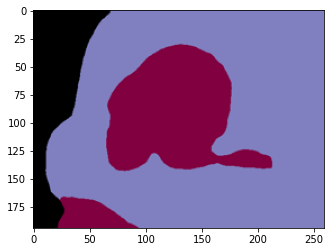

In [20]:
segvalues, output = model.segmentAsPascalvoc(img_path_5) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
plt.imshow(output)
plt.show()

(194, 259)


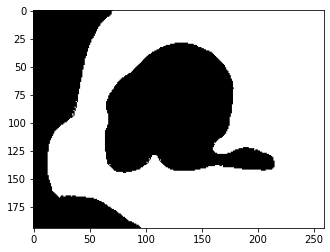

In [21]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map_5 = np.all(output==seg_color, axis=-1) 
print(seg_map_5.shape) 
plt.imshow(seg_map_5, cmap='gray')
plt.show()

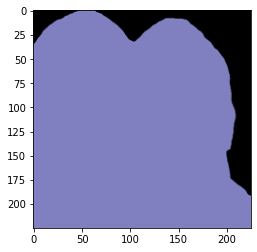

In [22]:
segvalues, output = model.segmentAsPascalvoc(img_path_6) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
plt.imshow(output)
plt.show()

(225, 225)


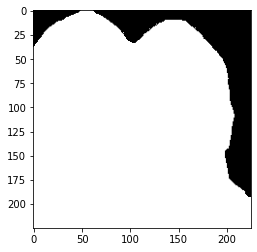

In [23]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map_6 = np.all(output==seg_color, axis=-1) 
print(seg_map_6.shape) 
plt.imshow(seg_map_6, cmap='gray')
plt.show()

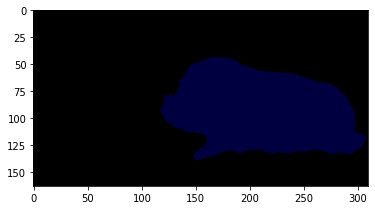

In [24]:
segvalues, output = model.segmentAsPascalvoc(img_path_7) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
plt.imshow(output)
plt.show()

(163, 310)


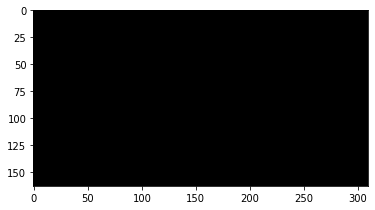

In [25]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map_7 = np.all(output==seg_color, axis=-1) 
print(seg_map_7.shape) 
plt.imshow(seg_map_7, cmap='gray')
plt.show()

In [26]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
#img_show_1 = img_orig_1.copy()
img_show_1 = img_orig_1.copy()
img_show_2 = img_orig_2.copy()
img_show_3 = img_orig_3.copy()
#img_show_4= img_orig_4.copy()
img_show_5 = img_orig_5.copy()
img_show_6 = img_orig_6.copy()
#img_show_7= img_orig_7.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask_1 = seg_map_1.astype(np.uint8) * 255
img_mask_2 = seg_map_2.astype(np.uint8) * 255
img_mask_3 = seg_map_3.astype(np.uint8) * 255
img_mask_5 = seg_map_5.astype(np.uint8) * 255
img_mask_6 = seg_map_6.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_1 = cv2.applyColorMap(img_mask_1, cv2.COLORMAP_SUMMER)
color_mask_2 = cv2.applyColorMap(img_mask_2, cv2.COLORMAP_SUMMER)
color_mask_3 = cv2.applyColorMap(img_mask_3, cv2.COLORMAP_SUMMER)
color_mask_5 = cv2.applyColorMap(img_mask_5, cv2.COLORMAP_SUMMER)
color_mask_6 = cv2.applyColorMap(img_mask_6, cv2.COLORMAP_SUMMER)

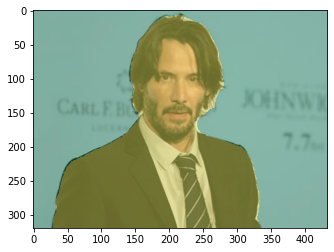

In [27]:
img_show_1 = cv2.addWeighted(img_show_1, 0.6, color_mask_1, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show_1, cv2.COLOR_BGR2RGB))
plt.show()

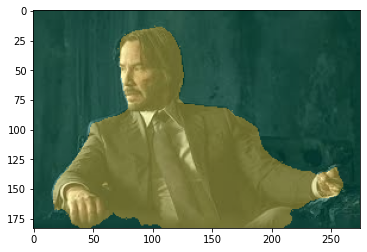

In [28]:
img_show_2 = cv2.addWeighted(img_show_2, 0.6, color_mask_2, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show_2, cv2.COLOR_BGR2RGB))
plt.show()

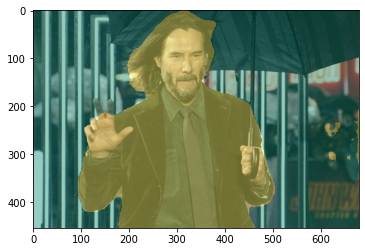

In [29]:
img_show_3 = cv2.addWeighted(img_show_3, 0.6, color_mask_3, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show_3, cv2.COLOR_BGR2RGB))
plt.show()

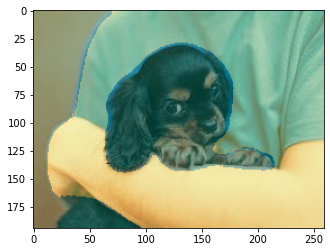

In [30]:
img_show_5 = cv2.addWeighted(img_show_5, 0.6, color_mask_5, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show_5, cv2.COLOR_BGR2RGB))
plt.show()

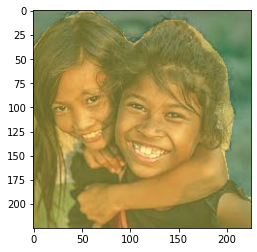

In [31]:
img_show_6 = cv2.addWeighted(img_show_6, 0.6, color_mask_6, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show_6, cv2.COLOR_BGR2RGB))
plt.show()

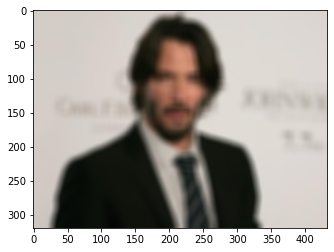

In [32]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur_1 = cv2.blur(img_orig_1, (13,13))
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur_1, cv2.COLOR_BGR2RGB))
plt.show()

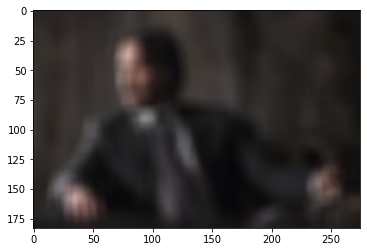

In [33]:
img_orig_blur_2 = cv2.blur(img_orig_2, (13,13))
plt.imshow(cv2.cvtColor(img_orig_blur_2, cv2.COLOR_BGR2RGB))
plt.show()

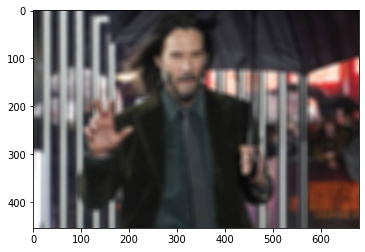

In [34]:
img_orig_blur_3 = cv2.blur(img_orig_3, (13,13))
plt.imshow(cv2.cvtColor(img_orig_blur_3, cv2.COLOR_BGR2RGB))
plt.show()

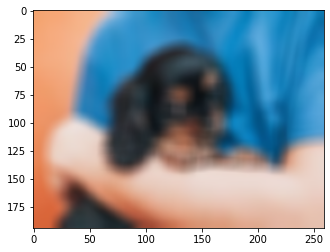

In [35]:
img_orig_blur_5 = cv2.blur(img_orig_5, (13,13))
plt.imshow(cv2.cvtColor(img_orig_blur_5, cv2.COLOR_BGR2RGB))
plt.show()

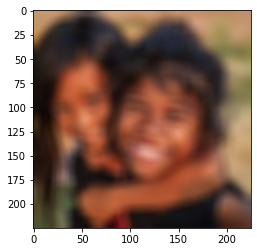

In [36]:
img_orig_blur_6 = cv2.blur(img_orig_6, (13,13))
plt.imshow(cv2.cvtColor(img_orig_blur_6, cv2.COLOR_BGR2RGB))
plt.show()

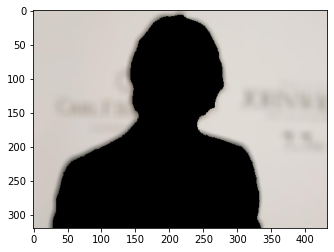

In [37]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color_1 = cv2.cvtColor(img_mask_1, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask_1 = cv2.bitwise_not(img_mask_color_1)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur_1 = cv2.bitwise_and(img_orig_blur_1, img_bg_mask_1)
plt.imshow(cv2.cvtColor(img_bg_blur_1, cv2.COLOR_BGR2RGB))
plt.show()

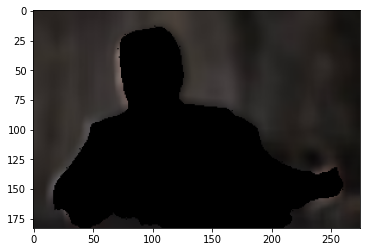

In [38]:
img_mask_color_2 = cv2.cvtColor(img_mask_2, cv2.COLOR_GRAY2BGR)
img_bg_mask_2 = cv2.bitwise_not(img_mask_color_2)
img_bg_blur_2 = cv2.bitwise_and(img_orig_blur_2, img_bg_mask_2)
plt.imshow(cv2.cvtColor(img_bg_blur_2, cv2.COLOR_BGR2RGB))
plt.show()

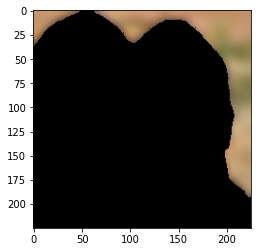

In [39]:
img_mask_color_6 = cv2.cvtColor(img_mask_6, cv2.COLOR_GRAY2BGR)
img_bg_mask_6 = cv2.bitwise_not(img_mask_color_6)
img_bg_blur_6 = cv2.bitwise_and(img_orig_blur_6, img_bg_mask_6)
plt.imshow(cv2.cvtColor(img_bg_blur_6, cv2.COLOR_BGR2RGB))
plt.show()

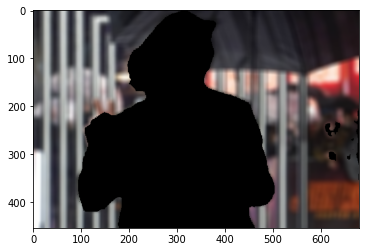

In [40]:
img_mask_color_3 = cv2.cvtColor(img_mask_3, cv2.COLOR_GRAY2BGR)
img_bg_mask_3 = cv2.bitwise_not(img_mask_color_3)
img_bg_blur_3 = cv2.bitwise_and(img_orig_blur_3, img_bg_mask_3)
plt.imshow(cv2.cvtColor(img_bg_blur_3, cv2.COLOR_BGR2RGB))
plt.show()

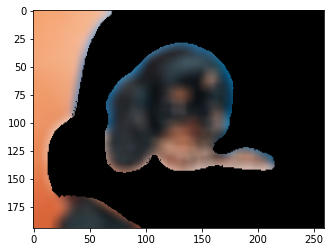

In [41]:
img_mask_color_5 = cv2.cvtColor(img_mask_5, cv2.COLOR_GRAY2BGR)
img_bg_mask_5 = cv2.bitwise_not(img_mask_color_5)
img_bg_blur_5 = cv2.bitwise_and(img_orig_blur_5, img_bg_mask_5)
plt.imshow(cv2.cvtColor(img_bg_blur_5, cv2.COLOR_BGR2RGB))
plt.show()

## Error Image로 따로 저장

In [42]:
my_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/'
error_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/error_images/'

In [58]:
error_image_path_5 = error_img_path + 'dog_2_error.jpg'
cv2.imwrite(error_image_path_5, img_bg_blur_5)

True

In [44]:
def image_show(_orgImg_path, _portrait_img_path):
    
    orgImg = cv2.imread(_orgImg_path)
    portrait_img = cv2.imread(_portrait_img_path)
    # Figure 생성
    fig = plt.figure(figsize=(orgImg.shape[1] / 72 * 2 , orgImg.shape[0] / 72 * 2))

    # 첫 번째 이미지 subplot 생성
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(cv2.cvtColor(orgImg, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')

    # 두 번째 이미지 subplot 생성
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(cv2.cvtColor(portrait_img, cv2.COLOR_BGR2RGB))
    ax2.set_title('Portrait Image')

    # 축 숨기기
    # ax1.axis('off')
    # ax2.axis('off')

    # 그림 표시
    plt.show()

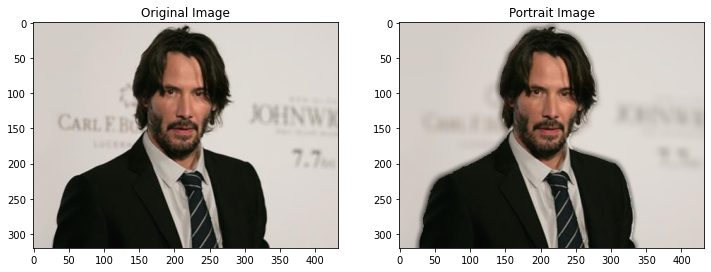

In [45]:
orig_img_path = my_img_path + 'kianu1.png'
output_image_path = my_img_path + 'kianu1_out.png'

img_concat = np.where(img_mask_color_1==255, img_orig_1, img_bg_blur_1)
cv2.imwrite(output_image_path, img_concat)

image_show(orig_img_path, output_image_path)

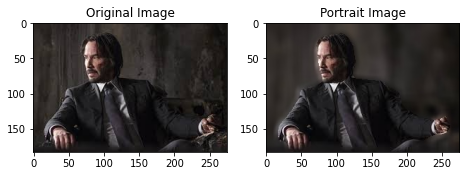

In [46]:
orig_img_path = my_img_path + 'kianu2.jpg'
output_image_path = my_img_path + 'kianu2_output.jpg'

img_concat = np.where(img_mask_color_2==255, img_orig_2, img_bg_blur_2)
cv2.imwrite(output_image_path, img_concat)

image_show(orig_img_path, output_image_path)

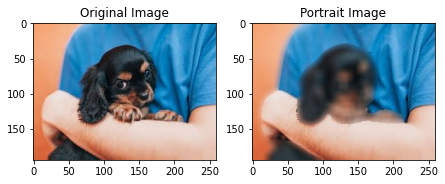

In [70]:
orig_img_path = my_img_path + 'dog_2.jpg'
output_image_path = my_img_path + 'dog_2_output.jpg'
#img_error_5 = output_image_path

img_concat = np.where(img_mask_color_5==255, img_orig_5, img_bg_blur_5)
cv2.imwrite(output_image_path, img_concat)

image_show(orig_img_path, output_image_path)

## Error Image로 따로 저장

In [71]:
error_image_path_5 = my_img_path + 'dog_2_error.jpg'
cv2.imwrite(error_image_path_5, img_bg_blur_5)

True

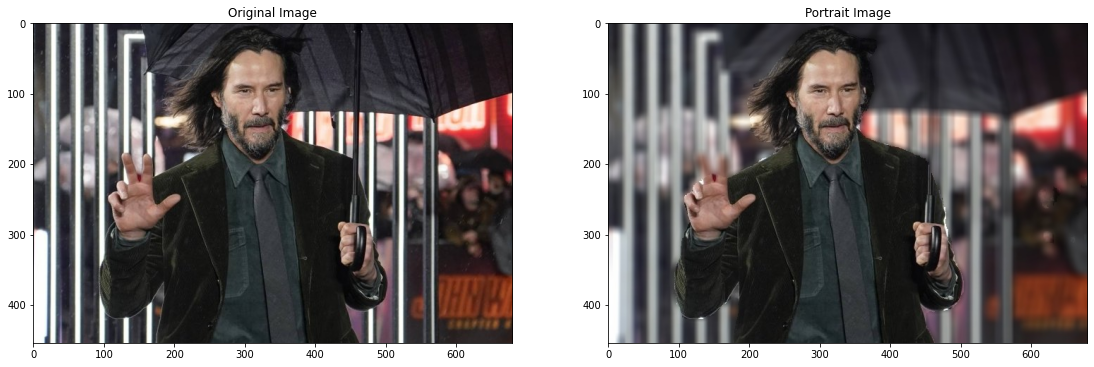

In [72]:
orig_img_path = my_img_path + 'kianu3.jpg'
output_image_path = my_img_path + 'kianu3_output.jpg'

img_concat = np.where(img_mask_color_3==255, img_orig_3, img_bg_blur_3)
cv2.imwrite(output_image_path, img_concat)

image_show(orig_img_path, output_image_path)

## Error Image로 따로 저장

In [73]:
error_image_path_3 = error_img_path + 'kianu3_error.jpg'
cv2.imwrite(error_image_path_3, img_bg_blur_3)

True

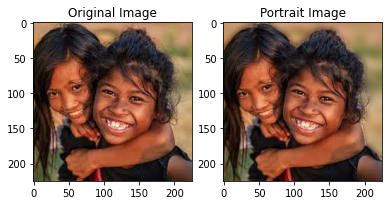

In [52]:
my_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/'
orig_img_path = my_img_path + 'black_girl.jpg'
output_image_path = my_img_path + 'black_girl_output.jpg'


img_concat = np.where(img_mask_color_6==255, img_orig_6, img_bg_blur_6)
cv2.imwrite(output_image_path, img_concat)

image_show(orig_img_path, output_image_path)

## 2. 사진에서 문제점 찾기

In [74]:
error_image_path_dog_2 = my_img_path + 'dog_2_error.jpg'
error_image_path_kianu3 = my_img_path + 'kianu3_error.jpg'


## 배경이 복잡하고 사물이 많은 경우

In [75]:
img_orig_4 = cv2.imread(img_path_4) 
img_orig_7 = cv2.imread(img_path_7)

img_orig_5 = cv2.imread(img_path_5)
img_orig_3 = cv2.imread(img_path_3)

error_image_path_3
img_error_4 = cv2.imread(img_path_4) 
img_error_7 = cv2.imread(img_path_7)
#img_error_5 = cv2.imread(error_image_path_dog_2)
img_error_5 = cv2.imread(error_image_path_5)
img_error_3 = cv2.imread(error_image_path_3)
error_image_path_5

'/aiffel/aiffel/human_segmentation/images/dog_2_error.jpg'

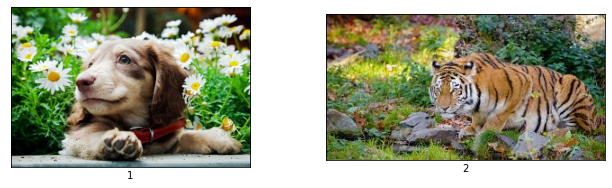

In [76]:
error_imgs_origins =[img_orig_4, img_orig_7]
imgs_show(error_imgs_origins, rows, cols)

## 사람과 같이 있는 경우(배경으로 인식)

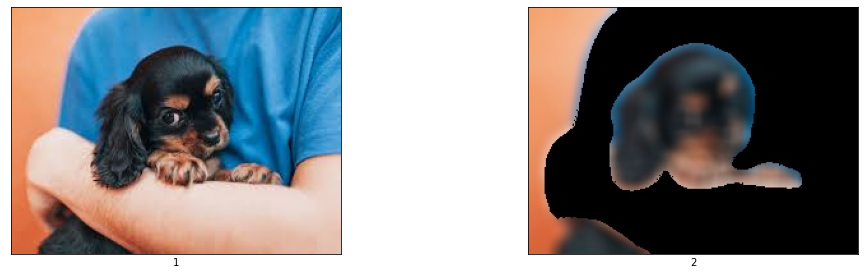

In [77]:
error_imgs_origins =[img_orig_5, img_error_5]
imgs_show(error_imgs_origins, 2, 2)

## 손가락와 뒷배경 창살 구분안됨

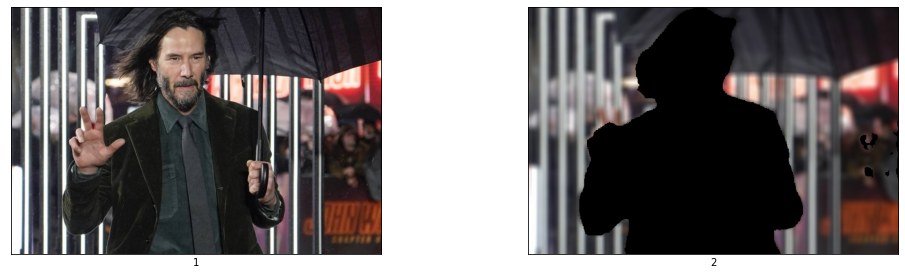

In [78]:
error_imgs_origins =[img_orig_3, img_error_3 ]
imgs_show(error_imgs_origins, 2, 2)

## 크로마키

In [57]:
def chroma_key_mode(_img_path, _S_Model, _LABEL_NAMES, _colormap, _object, _background_img):
    segvalues, output = model.segmentAsPascalvoc(_img_path)

    img_orig = cv2.imread(_img_path)

    img_orig_resize = cv2.resize(_background_img, (img_orig.shape[1], img_orig.shape[0]))
    index = _LABEL_NAMES.index(_object)
    
    seg_color = _colormap[index]
    temp = seg_color[0]
    seg_color[0] = seg_color[2]
    seg_color[2] = temp
    seg_map = np.all(output==seg_color, axis=-1) 
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255

    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    # cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
    # 연산을 하고 나면 배경은 255 사람은 0입니다.
    img_bg_mask = cv2.bitwise_not(img_mask_color)

    # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
    # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
    # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
    img_bg = cv2.bitwise_and(img_orig_resize, img_bg_mask)
    img_concat = np.where(img_mask_color==255, img_orig, img_bg)
    
    return img_concat

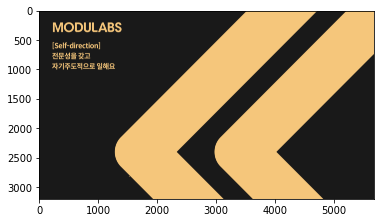

In [82]:
path = my_img_path + 'background.png'
background_img = cv2.imread(path)
chroma_key_img = chroma_key_mode(path, model, LABEL_NAMES, colormap, LABEL_NAMES[15], background_img) #LABEL_NAMES[15]은 사람 입니다.

plt.imshow(cv2.cvtColor(chroma_key_img, cv2.COLOR_BGR2RGB))
plt.show()